In [10]:
#Downgrade fastai to 1.0.61
#Downgrade protobuf to 3.20.0
#Downgrade spacy to 2.3.5
from fastai.text import TextList, language_model_learner, AWD_LSTM, text_classifier_learner
from fastai.vision import ClassificationInterpretation
from pandas_ods_reader import read_ods
import re

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
def clean_txt(hindi_str):
    hindi_str = re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?\S', '', hindi_str, flags=re.MULTILINE)
    
    hindi_str = re.sub(r'[A-Za-z0-9]+', '', 
                       hindi_str, flags=re.MULTILINE)
    
    hindi_str = ''.join(re.sub("(@[A-Za-z0–9]+)|(#[A-Za-z0–9]+)|([@])|([#])|([,])|([\.])|([\/])|([\])|([\)])|([\(])|([-])|([\:])|([\?])|([_])|([!])","",hindi_str))
    hindi_str = ''.join(re.sub("(\')|(\")", "", hindi_str))
    hindi_str = hindi_str.strip()
    return hindi_str

In [20]:
hindi_data = read_ods("model_train.ods", 1, headers=False)
hindi_data.head(5)

,column.0,column.1
0,लोग वतन तक खा जाते हैं इसका इसे यकीन नहींमान ज...,negative
1,गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...,negative
2,ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है,negative
3,यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...,negative
4,अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...,negative


In [21]:
hindi_data = hindi_data.rename(columns={'column.0': 'hindi_text', 'column.1': 'label'})

In [22]:
for i in range(hindi_data['hindi_text'].size):
    hindi_data['hindi_text'][i] = clean_txt(hindi_data['hindi_text'][i])
hindi_data.head()

,hindi_text,label
0,लोग वतन तक खा जाते हैं इसका इसे यकीन नहींमान ज...,negative
1,गुमनाम है वतन पर मिटने वाले लोग आतन्कवादियों स...,negative
2,ज़ंजीर बदली जा रही थी मैं समझा था रिहाई हो गयी है,negative
3,यूपी में बड़े स्तर पर दंगे करवा सकती है बीजेपी...,negative
4,अंग्रेजी नहीं आती है इसलिए हिन्दी ट्विट ज्यादा...,negative


In [23]:
stop_words = ["अंदर","अत","अदि","अप","अपना","अपनि","अपनी","अपने","अभि","अभी","आदि","आप","इंहिं","इंहें","इंहों","इतयादि","इत्यादि","इन",
              "इनका","इन्हीं","इन्हें","इन्हों","इस","इसका",
              "काफि","काफ़ी","कि","किंहें","किंहों","कितना","किन्हें","किन्हों","किया","किर","किस","किसि","किसी","किसे","की","कुछ","कुल",
                "के","को","कोइ","कोई","कोन","कोनसा","कौन","कौनसा","गया","घर","जब","जहाँ","जहां","जा","जिंहें","जिंहों","जितना","जिधर",
                "जिन","जिन्हें","जिन्हों","जिस","जिसे","जीधर","जेसा","जेसे","जैसा","जैसे","जो","तक","तब","तरह","तिंहें","तिंहों","तिन","तिन्हें",
                "तिन्हों","तिस","तिसे","तो","था","थि","थी","थे","दबारा","दवारा","दिया","दुसरा","दुसरे","दूसरे","दो","द्वारा","न","नहिं","नहीं",
                "ना","निचे","निहायत","नीचे","ने","पर","पहले","पुरा","पूरा","पे","फिर","बनि","बनी","बहि","बही","बहुत","बाद","बाला",
                "बिलकुल","भि","भितर","भी","भीतर","मगर","मानो","मे","में","यदि","यह","यहाँ","यहां","यहि","यही","या","यिह","ये","रखें",
                "रवासा","रहा","रहे","ऱ्वासा","लिए","लिये","लेकिन","व","वगेरह","वरग","वर्ग","वह","वहाँ","वहां","वहिं","वहीं","वाले","वुह","वे",
              "इसकि","इसकी","इसके","इसमें","इसि","इसी","इसे","उंहिं","उंहें","उंहों","उन","उनका","उनकि","उनकी","उनके","उनको","उन्हीं",
              "उन्हें","उन्हों","उस","उसके","उसि","उसी",
              "उसे","एक","एवं","एस","एसे","ऐसे","ओर","और","कइ","कई","कर","करता","करते","करना","करने","करें","कहते","कहा","का",
                    "वग़ैरह","संग","सकता","सकते","सबसे","सभि","सभी","साथ","साबुत","साभ","सारा","से","सो","हि","ही","हुअ","हुआ","हुइ","हुई",
                    "हुए","हे","हें","है","हैं","हो","होता","होति","होती","होते","होना","होने"]
tokenized = hindi_data['hindi_text'].apply(lambda x: x.split())
tokenized_processed = tokenized.apply(lambda x: [item for item in x if item not in stop_words])

processed_txt = []
for i in range(len(hindi_data)): 
    txt = ' '.join(tokenized_processed[i]) 
    processed_txt.append(txt) 
hindi_data['hindi_text'] = processed_txt

hindi_data.head()

,hindi_text,label
0,लोग वतन खा जाते यकीन नहींमान जाएगा तू ले जाकर ...,negative
1,गुमनाम वतन मिटने लोग आतन्कवादियों मिलकर मशहूर गये,negative
2,ज़ंजीर बदली रही मैं समझा रिहाई गयी,negative
3,यूपी बड़े स्तर दंगे करवा सकती बीजेपी मुलायम सि...,negative
4,अंग्रेजी आती इसलिए हिन्दी ट्विट ज्यादा हूँ । न...,negative


In [24]:
hindi_data['label'].value_counts()

positive    3254
negative    3174
neutral     2649
Name: label, dtype: int64

In [25]:
model_data = hindi_data.copy()
model_data.dropna(inplace=True)
model_data[1:1000]

,hindi_text,label
1,गुमनाम वतन मिटने लोग आतन्कवादियों मिलकर मशहूर गये,negative
2,ज़ंजीर बदली रही मैं समझा रिहाई गयी,negative
3,यूपी बड़े स्तर दंगे करवा सकती बीजेपी मुलायम सि...,negative
4,अंग्रेजी आती इसलिए हिन्दी ट्विट ज्यादा हूँ । न...,negative
5,कश्मीर जल जिहाद ।,negative
...,...,...
995,नई फिल्म परमाणु स्टार कास्ट इंटरव्यू …,positive
996,बाबा राम रहीम यानि अहिंसा पाठ पढ़ाते थेक्या सी...,positive
997,यूपी हावी कल्चर अन्य वीडियो,positive
998,,positive


In [27]:
# Creates a textlist object from the model_data dataframe using the hindi_text column
# 10% validation data
# Prepares the data for language modeling. In this context, it means creating labels that represent the next word in the sequence.
# Creates a DataBunch object, which is a container for the training and validation data. It organizes the data in a format suitable for training a deep learning model.
data_lang_model = (TextList.from_df(model_data, cols='hindi_text')
                     .split_by_rand_pct(0.1)
                     .label_for_lm()
                     .databunch())

c:\users\nihaa\appdata\local\programs\python\python39\lib\site-packages\fastai\core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


In [30]:
# Creates a textlist object from the model_data dataframe using the hindi_text column
# Use vocabulary from previously created language model (The language model is trained to predict the next word based on the context provided by the preceding words.)
# 10% validation data
# Prepares the data for classification. It assumes that there is a column named 'label' in the DataFrame (model_data) that contains the class labels for each text example.
# Creates a DataBunch object, which is a container for the training and validation data
data_lang_class = (TextList.from_df(model_data, cols='hindi_text', vocab=data_lang_model.vocab)
                     .split_by_rand_pct(0.1)
                     .label_from_df('label')
                     .databunch())

In [31]:
# special tokens used in the fastai library's tokenization process
data_lang_class.show_batch(4)

text,target
xxbos चलते चलते याद रखना तुम्हारे xxunk xxunk कहीं दूर उतार रखना । । ज़िंदगी xxunk सच जान xxunk । । xxunk xxunk इस्लाम । । xxunk xxunk,negative
xxbos क्राइम ब्रांच xxunk पेपर लीक जुड़े केस चार लोगों अरेस्ट है । आरोपियों पहचान xxunk शर्मा xxunk राव कुशल ने …,neutral
xxbos बेटा बाप पैसे दिखा पाकिस्तान अगर बाढ़ आ जाए xxunk xxunk भागने जगह है । साला मदद करेगा गद्दार xxunk ।,negative
xxbos नज़र आता डर डर तेरे xxunk अम्मा आना मुझे इतने बुरे xxunk अम्मा xxunk xxunk आई हूँ मुझको लौटा दे …,neutral


In [32]:
# special tokens used in the fastai library's tokenization process
data_lang_model.show_batch(4)

idx,text
0,xxunk हिंदुस्तान पुलिस xxunk माना जाएगा हिंदुस्तान पुलिस xxunk नहीँ चाहिए भारत xxbos संघर्ष आदमी अकेला सफलता दुनिया xxunk xxunk नया इतिहास रचा है । xxbos मोहब्बत xxunk xxbos तीखी बात राम xxunk xxunk इल्जाम लगा दिए xxunk संस्था इल्जाम नही xxunk इतनी जिंदगी देखने आदमी xxunk xxbos मुलाकात जरूरी xxunk । एक उम्र कैद हूँ आँसू । । xxbos माओवादियों संपत्ति होगी कुर्क xxbos अगर मुलायम अखिलेश xxunk दंगा
1,xxunk पड़ती xxbos हमारा प्यार उन्हे प्यार बस हार गये हम जानकार जिससे उन्हे प्यार वो हमारा यार … xxbos xxunk तेल xxunk तलवार खत्म होगा xxunk xxunk गैस xxunk xxbos इस्लाम शांति भाईचारा xxunk इसलिये मुसलमानों शांति उम्मीद रखना xxunk xxbos xxunk जी चोट बचना मुश्किल नामुमकिन xxunk देते । xxbos xxunk xxunk दे गुरु सम्मान xxunk खुद xxbos सलमान खान हवाई xxunk xxunk खबर xxunk वालों xxunk माहौल
2,मौसम अच्छा ऐसी xxunk बात xxunk मेरे पैर जमीन पत्नी xxunk फांसी लगा लो xxbos उन्होंने xxunk बच्चों xxunk देने xxunk अरब xxunk करोड़ xxunk खर्च दिए बिजली xxbos कश्मीर तबाही सात दिन बाढ़ तीन मंत्री लापता xxunk xxunk बैठे लोग दैनिक भास्कर xxbos मेरे मरने xxunk xxunk पड़ेगा ऐ दोस्त बस xxunk xxunk मेरा हम xxunk चला xxbos करोड़ मैच फिक्सिंग लेकर मीडिया पुलिस दिन इतने परेशान कोयला xxunk
3,xxbos xxwrep xxunk हा xxunk xxunk लेना वाह धोनी वाह xxbos आखिरी ओवर आखिरी गेंद रन बना हीरो बनने चक्कर घमंडी धोनी जीता xxunk भारत हरा xxbos xxunk xxunk आज योगी जी लोगो xxunk बाप बेटे सरकार xxunk फेंकने xxunk लिया xxunk बाबा xxunk xxbos पास नेपाल देने करोड़ & भूटान करोड़ दिल्ली इलेक्शन करोड़ xxbos भारत इस्लामिक राज कायम करेगा अल xxunk xxunk छुपे xxunk हाथ xxunk xxunk बोतल


In [33]:
# accessing the vocabulary of the language model's DataBunch object 
data_lang_model.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '।']

In [34]:
data_lang_model.save('models/data_lang_model_v2.pkl')

## Fine Tuning Language Model

In [35]:
# Set up a language model learner with AWD_LSTM architecture (RNN)
# Load pre-trained weights from the hindi_pretrained_lm.pth file
# Prepare the model for training on the provided DataBunch object
# Dropout regularization set to 0.5
learn_model = language_model_learner(data_lang_model, AWD_LSTM, pretrained="hindi_pretrained_lm.pth", drop_mult=0.5)

In [36]:
# find an appropriate learning rate for training the language model by running a short training session
learn_model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


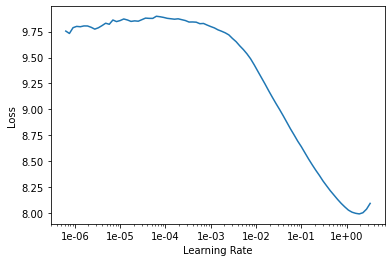

In [37]:
learn_model.recorder.plot()

In [38]:
# 1 one cycle of learning rate adjustment.
# 3e-02 maximum learning rate during the cycle.
# Momentum values for the optimizer. Accelerates the training process by giving more weight to recent gradients. 
# Here, (0.8, 0.7) means that the momentum will start at 0.8 and gradually decrease to 0.7 during the cycle.
learn_model.fit_one_cycle(1, 3e-02, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,7.128752,5.859288,0.250744,00:41


In [39]:
# Unfreeze the pre-trained layers of the language model
learn_model.unfreeze()
learn_model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


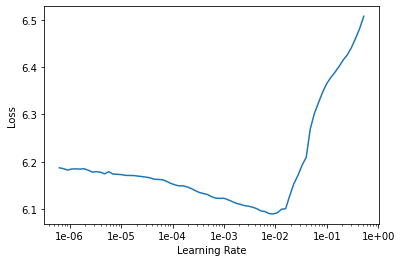

In [40]:
# Skip the last few points of the plot which could be noisy
learn_model.recorder.plot(skip_end=15)

In [41]:
# 20 epochs of training
learn_model.fit_one_cycle(20, 3e-04, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.134583,5.803843,0.268006,00:43
1,6.101065,5.785074,0.261533,00:44
2,6.066214,5.732294,0.272396,00:43
3,6.033957,5.707126,0.271429,00:47
4,6.003634,5.681494,0.269048,00:46
5,5.962395,5.664310,0.268676,00:45
6,5.923277,5.710461,0.279167,00:46
7,5.883269,5.615135,0.272842,00:44
8,5.835711,5.613738,0.281027,00:48
9,5.784202,5.582701,0.275967,00:49


In [42]:
# Generate text using pre-trained language model
initial_word = "भारत"
total_words = 30
total_sentences = 5

print("\n".join(learn_model.predict(initial_word, total_words, temperature = 0.5) for _ in range(total_sentences)))

भारत अब शोभा मिलेंगे है । xxbos अगर मौसम बार भारी बीच कहानी मदद xxbos मोदी हमें मोदी मोदी दिन साल मोदी पुलिस जनता अन्य वीडियो xxbos दिल्ली नोएडा मामले इलाके
भारत दोनों महाराष्ट्र मोदी लोगों मोदी मोदी मोदी लोगों बजे xxbos दिल्ली साल शास्त्री जिम्मेदार बोल xxbos दिल्ली निगम निगम सिर्फ मामले अच्छे रही सरकार अन्य वीडियो … xxbos उन्होंने भारत
भारत कलाकारों देश समय सिंह देखिए नीरव देखिए कार्यक्रम … xxbos दिल्ली क्या क्या xxbos पिछले बच्चों बेहद खतरा xxbos चुनाव सरकार गांधी सरकार क्या मोदी ओम बोले … xxbos दिल्ली
भारत पटेल शर्मसार बच्चे xxbos फिल्म इतना लो xxbos दिल्ली अब इलाके डायरेक्टर इलाके इलाके पुलिस इलाके पुलिस इलाके पुलिस पुलिस पुलिस पुलिस पुलिस पुलिस पुलिस पुलिस … xxbos पुलिस आने
भारत आज अब हम बोल बजे xxbos ‘ ’ ‘ ‘ ‘ ’ ‘ ‘ ‘ ‘ ’ ‘ ‘ ‘ ‘ ‘ ‘ ‘ ‘ ‘ ‘ ‘ ‘ ‘


In [43]:
learn_model.export("models/hindi_lang_model_v2.pkl")

In [44]:
learn_model.save_encoder('tuned_encoder_10000_v2')

# Training Sentiment Analysis Model (Transfer Learning)

In [45]:
# Load a pre-trained language model encoder into the text classification model. Transfer Learning.
# ASGD Weight-Dropped LSTM
# 0.5 dropout regularization
sentiment_model = text_classifier_learner(data_lang_class, AWD_LSTM, drop_mult=0.5)
sentiment_model.load_encoder('tuned_encoder_10000_v2')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (8170 items)
x: TextList
xxbos लोग वतन खा जाते यकीन xxunk जाएगा तू ले जाकर दिल्ली दिखा ला दोस्त,xxbos गुमनाम वतन xxunk लोग xxunk मिलकर मशहूर गये,xxbos xxunk बदली रही मैं समझा रिहाई गयी,xxbos यूपी बड़े स्तर दंगे करवा सकती बीजेपी मुलायम सिंह यादव,xxbos अंग्रेजी आती इसलिए हिन्दी xxunk ज्यादा हूँ । निजी राय बुरा लगे xxunk
y: CategoryList
negative,negative,negative,negative,negative
Path: .;

Valid: LabelList (907 items)
x: TextList
xxbos नोएडा संदिग्ध आतंकवादी गिरफ्तार किए गए xxunk बंगाल पुलिस यूपी xxunk संयुक्त एक्शन दोनो आतंकी xxunk …,xxbos उदारीकरण ऐसा पहला चुनाव जिसमें देश xxunk आर्थिक विकास बीच चुनावी समर अग्रसर है ।,xxbos सच्चाई xxunk आसान दुनिया भर xxunk पड़ता,xxbos xxunk अलग xxunk बिजली xxunk लगे xxunk लग है ।,xxbos …
y: CategoryList
neutral,positive,negative,negative,positive
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(4832, 400, padding_idx=1)
      (en

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


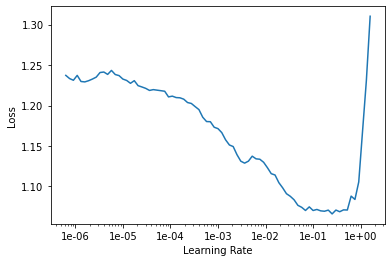

In [46]:
# find an appropriate learning rate for training the classifier model by running a short training session
sentiment_model.lr_find()
sentiment_model.recorder.plot()

In [47]:
# 1 one cycle of learning rate adjustment.
# 3e-03 maximum learning rate during the cycle.
sentiment_model.fit_one_cycle(1, 3e-03, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.914395,0.821906,0.577729,01:42


In [48]:
# Freeze all layers of the model except the last two
# Only train the last layers on the specific classification task
sentiment_model.freeze_to(-2)
# The learning rate starts at 1e-03/(2.6**4), increases to 1e-03 and then decreases again during training.
sentiment_model.fit_one_cycle(1, slice(1e-03/(2.6**4),1e-03), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.873302,0.791948,0.600882,01:52


In [49]:
# Freeze all layers of the model except the last three
sentiment_model.freeze_to(-3)
# 10 epochs of training
sentiment_model.fit_one_cycle(10, slice(5e-03/(2.6**4),5e-03), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.853665,0.789096,0.609702,02:17
1,0.846031,0.801357,0.605292,02:12
2,0.819999,0.773208,0.633958,02:13
3,0.813013,0.785777,0.635061,02:13
4,0.793502,0.743876,0.622933,02:04
5,0.763861,0.738212,0.652701,02:07
6,0.732930,0.719741,0.650496,02:09
7,0.677530,0.688057,0.684675,02:17
8,0.658407,0.686190,0.685777,02:16
9,0.649143,0.681141,0.680265,02:18


In [50]:
# Unfreeze the pre-trained layers of the model
sentiment_model.unfreeze()
sentiment_model.fit_one_cycle(10, slice(5e-04/(2.6**4),5e-04), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.633661,0.681162,0.687982,02:29
1,0.634498,0.676155,0.687982,02:46
2,0.629193,0.679334,0.686880,02:31
3,0.615006,0.660731,0.701213,02:35
4,0.598102,0.657806,0.694598,02:33
5,0.597239,0.662675,0.702315,02:25
6,0.579463,0.663533,0.703418,02:21
7,0.571204,0.655999,0.701213,02:21
8,0.556904,0.654436,0.703418,02:23
9,0.556563,0.652869,0.703418,02:24


In [51]:
sentiment_model.export("sentiment_classifier_hindi_v2.pkl")

In [52]:
sentiment_model.predict("आज़तक पर देखिये कितनी स्मार्ट हुई स्मार्ट फेंसिंग Exclusive आज रात 9.30 pm पर @BSF_India")

(Category tensor(0), tensor(0), tensor([0.4985, 0.2220, 0.2795]))

In [53]:
str(sentiment_model.predict("आज़तक पर देखिये कितनी स्मार्ट हुई स्मार्ट फेंसिंग Exclusive आज रात 9.30 pm पर @BSF_India")[0])

'negative'

In [54]:
sentiment_model.predict("Female IAS officer molestation दिल्लीः साकेत कोर्ट परिसर में महिला IAS अधिकारी से छेड़छाड़ https://t.co/MtZhnAfYiV")

(Category tensor(0), tensor(0), tensor([0.6839, 0.2473, 0.0688]))

In [55]:
str(sentiment_model.predict("Female IAS officer molestation दिल्लीः साकेत कोर्ट परिसर में महिला IAS अधिकारी से छेड़छाड़ https://t.co/MtZhnAfYiV")[0])

'negative'

In [56]:
predictions, y, losses = sentiment_model.get_preds(with_loss=True)

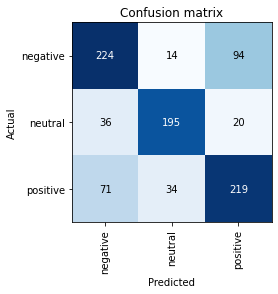

In [57]:
metrics = ClassificationInterpretation(sentiment_model, predictions, y, losses)
metrics.plot_confusion_matrix()

# Testing Sentiment Analysis Model

In [58]:
test_data = read_ods("model_test.ods", 1, headers=False)
test_data = test_data.rename(columns={'column.0': 'hindi_text_1', 'column.1': 'label_1',
                                      'column.2': 'hindi_text_2', 'column.3': 'label_2',
                                      'column.4': 'hindi_text_3', 'column.5': 'label_3',})
test_data.head(5)

,hindi_text_1,label_1,hindi_text_2,label_2,hindi_text_3,label_3
0,मुमकिन है कि रिलायंस कैपिटल का शेयर 330 रुपये ...,positive,बुंदेलखंड के किसानों को अबकी बार बड़ी उम्मीदें...,negative,"RT @mumbaitak: शिवसेना-बीजेपी गठबंधन में दरार,...",neutral
1,सितम्बर में इसकी कमिशिनिंग संभावित है।,positive,उन्होंने कहा कि चूंकि पूंजी की जरूरत बहुत बड़ी...,negative,"RT @mumbaitak: शिवसेना-बीजेपी गठबंधन में दरार,...",neutral
2,भारतीय कंपनी ने संभावित डील के बारे में कमेंट ...,positive,पश्चिम बंगाल में शासन द्वारा ऐसी शिकायतें लगात...,negative,RT @mumbaitak: बोरवेल में फंसे 6 साल के मासूम ...,neutral
3,हम अदालत में लड़ाई लड़ने के अलावा इस मामले को ...,positive,शहर में नेटवर्किंग कारोबार का मकड़जाल लगातार फ...,negative,RT @mumbaitak: बीजेपी-शिवसेना गठबंधन पर उद्धव ...,neutral
4,असल में कोशिश की जा रही है कि संभावित तौर पर क...,positive,हमें नहीं लगता कि आने वाले दिनों में कीमतों मे...,negative,RT @mumbaitak: ठाणे के कोरम मॉल में घुसा तेंदु...,neutral


In [59]:
len(test_data)

685

In [60]:
count_pos=0
count_pos_neg=0
count_neg=0
count_neg_pos=0
count_neu=0
count_neu_pos=0

for text in test_data.hindi_text_1:
    if str(sentiment_model.predict(str(text))[0]) == "positive":
        count_pos += 1
    elif str(sentiment_model.predict(str(text))[0]) == "negative":
        count_pos_neg += 1
    
for text in test_data.hindi_text_2:
    if str(sentiment_model.predict(str(text))[0]) == "negative":
        count_neg += 1
    elif str(sentiment_model.predict(str(text))[0]) == "positive":
        count_neg_pos += 1
    
for text in test_data.hindi_text_3:
    if str(sentiment_model.predict(str(text))[0]) == "neutral":
        count_neu+=1
    elif str(sentiment_model.predict(str(text))[0]) == "positive":
        count_neu_pos+=1


# Positive Test Data Eval Metrics

In [61]:
count_pos/685 , count_pos_neg/685 , 1-((count_pos+count_pos_neg)/685)

(0.48613138686131385, 0.4759124087591241, 0.03795620437956204)

# Negative Test Data Eval Metrics

In [62]:
count_neg/685 , count_neg_pos/685 , 1-((count_neg+count_neg_pos)/685)

(0.8525547445255475, 0.10948905109489052, 0.03795620437956204)

# Neutral Test Data Eval Metrics

In [63]:
count_neu/685 , count_neu_pos/685 , 1-((count_neu+count_neu_pos)/685)

(0.727007299270073, 0.0364963503649635, 0.23649635036496353)

In [64]:
sentiment_model.export("sentiment_classifier_hindi.pkl")